# The Fama-French 5 Factor Model

In [1]:
import os

import pandas as pd

In [2]:
TICKER_PATH = '../indices/'

START_DATE = '2000-01-01'
END_DATE = '2019-12-31'

if not os.path.isdir(TICKER_PATH) or len(os.listdir(TICKER_PATH)) == 0:
    %run ../stock_script.py start=$START_DATE end=$END_DATE path=$TICKER_PATH

In [3]:
df_list = list()
i = 0
for file in os.listdir(TICKER_PATH):
    temp = pd.read_csv(TICKER_PATH+file, parse_dates=[0])
    temp['ticker'] = file.split('_')[0]
    df_list.append(temp)
    i += 1
    if i == 5:
        break

df = pd.concat(df_list)

In [4]:
from portfolio_functions.minimum_variance_portfolio import MinimumVariancePortfolio

In [5]:
mvp = MinimumVariancePortfolio(df)

Creating Frontier: 100%|██████████| 20/20 [00:02<00:00,  9.32it/s]


[6.70137818e+03 3.25131342e+00 1.42384182e-05 2.60872087e+04
 9.30099029e-01]
7335.498324075946 


[ 3.95095465 -0.98375665 -0.98375665 -0.9837175  -0.98375665]
1.4823346840626572 


[ 3.95332515 -0.98447139 -0.98447139 -0.98434011 -0.98447139]
1.4832413769276014 


[ 3.95542789 -0.9851393  -0.9851393  -0.9849712  -0.9851393 ]
1.4840530775820415 


[ 3.9487664  -0.98294181 -0.98294181 -0.98293037 -0.98294181]
1.4814695298477842 




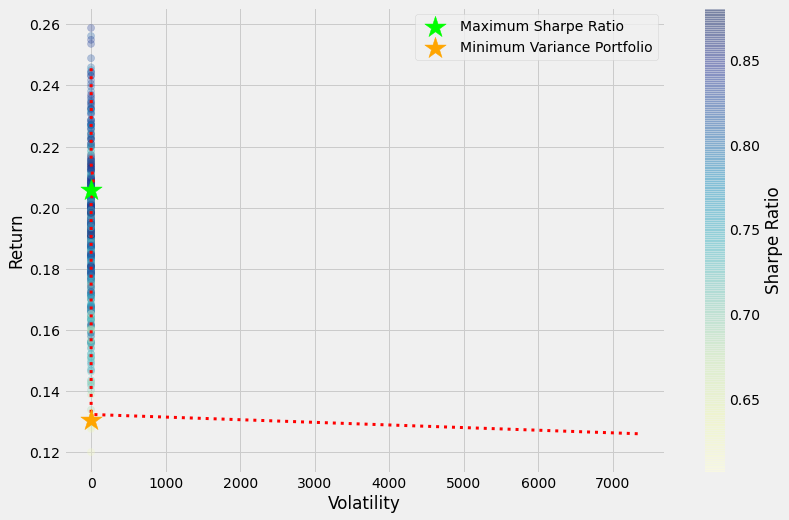

In [6]:
mvp.plot_minimum_variance_frontier(iters=500, points=20)

In [7]:
r = mvp.weights_for_return(0.2)
r

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  5e+00  2e+00  2e+00
 1:  6.7190e-04  6.0997e+01  1e+01  2e+00  2e+00
 2:  9.9475e-04  8.0429e+01  2e+01  2e+00  2e+00
 3:  1.1279e-03  1.2441e+02  4e+01  2e+00  2e+00
 4:  1.2006e-03  3.1727e+02  9e+01  2e+00  2e+00
 5:  1.2552e-03  1.1865e+03  2e+02  2e+00  2e+00
 6:  1.2879e-03  4.4122e+03  4e+02  2e+00  2e+00
 7:  1.3217e-03  1.9671e+04  1e+03  2e+00  2e+00
 8:  1.3652e-03  1.2163e+05  4e+03  2e+00  2e+00
 9:  1.4144e-03  8.3706e+05  2e+04  2e+00  2e+00
10:  1.6235e-03  1.7084e+07  3e+05  2e+00  2e+00
11:  1.6477e-03  5.8323e+07  7e+05  2e+00  2e+00
12:  1.7083e-03  3.7639e+08  3e+06  2e+00  2e+00
13:  1.7531e-03  1.8518e+09  1e+07  2e+00  2e+00
14:  1.9641e-03  3.3772e+10  2e+08  2e+00  2e+00
15:  2.2006e-03  7.6030e+11  4e+09  2e+00  2e+00
16:  3.3303e-03  8.0643e+13  2e+11  2e+00  2e+00
17:  4.1514e-03  2.7333e+16  1e+13  2e+00  9e+02
18:  4.3900e-03  5.3088e+19  8e+14  2e+00  5e+05
19:  4.2404e-01  5.97

{'x': <5x1 matrix, tc='d'>,
 'y': <2x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'unknown',
 'gap': 9.64512062786999e+50,
 'relative gap': 1.1366390601199037e-06,
 'primal objective': 0.4493407394682541,
 'dual objective': 8.485649461010541e+56,
 'primal infeasibility': 33.70084356783297,
 'dual infeasibility': 2.2185664300433218e+39,
 'primal slack': 5.062534651858219e-12,
 'dual slack': 3.4028234663852886e+38,
 'iterations': 35}

In [8]:
import numpy as np
from cvxopt import matrix, solvers

test = df.pivot_table(index='Date',
                      values='Close',
                      columns='ticker')
log_ret = test.pct_change()

np.array([np.ones(log_ret.shape[1]), log_ret.mean().values]).T

array([[1.00000000e+00, 1.19252960e-03],
       [1.00000000e+00, 4.49554130e-04],
       [1.00000000e+00, 9.70347695e-04],
       [1.00000000e+00, 3.37049688e-04],
       [1.00000000e+00, 8.44553441e-04]])

In [9]:
np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]])
np.diag([1,0])

array([[1, 0],
       [0, 0]])

In [10]:
np.array([np.ones((1, log_ret.shape[1])).flatten(), log_ret.mean().values.flatten()])

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.19252960e-03, 4.49554130e-04, 9.70347695e-04, 3.37049688e-04,
        8.44553441e-04]])

In [11]:
P = matrix(log_ret.cov().values, tc='d')
q = matrix(np.zeros((log_ret.shape[1], 1)), tc='d')
# G = matrix(np.eye(log_ret.shape[1]) * -1, tc='d')
G = matrix(np.diag([-1 for _ in range(log_ret.shape[1])]), tc='d')
h = matrix(np.zeros(log_ret.shape[1]), tc='d')
A = matrix(np.array([np.ones((1, log_ret.shape[1])).flatten(), log_ret.mean().values.flatten()]), tc='d')
# A = matrix(np.ones((1, log_ret.shape[1])))
# b = matrix(np.array([[1], [ret_val]]), tc='d')
b = matrix([1.0, 0.1], tc='d')

In [12]:
P

<5x5 matrix, tc='d'>

In [13]:
q

<5x1 matrix, tc='d'>

In [14]:
G

<5x5 matrix, tc='d'>

In [15]:
h

<5x1 matrix, tc='d'>

In [16]:
A

<2x5 matrix, tc='d'>

In [17]:
b

<2x1 matrix, tc='d'>

In [18]:
G = matrix(0.0, (3,3))[::4] = 1
# G[::4] = -1

In [19]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]